# Design, Implementation, Evaluation, and Interpretation of Regression and Classification Models
Student: Rishi Saraff
ID: 2501941


---

  

# Classification Task

---



# Task 1: Exploratory Data Analysis and Data Understanding
## 1.1 Choosing a Dataset
**Dataset Name: Air Quality History**


---





#### **Detailed description of the dataset:**

**(a) When and by whom the dataset was created?**

This dataset was created by the United States Environmental Protection Agency (EPA) as part of their Air Quality System (AQS). The EPA, established in 1970, maintains this database through continuous monitoring from air quality stations across the United States. The data represents measurements collected from state, local, and tribal monitoring agencies in partnership with the EPA.


**(b) How and from where the dataset was accessed.**

This dataset was accessed from the catalog.data.gov website, and the dataset itself is located at this link https://catalog.data.gov/dataset/air-quality-history. The csv file named Air_Quality_History.csv was then downloaded accessed.

**(c) Justification of alignment with the selected UNSDG.**

This dataset aligns with TWO critical UN Sustainable Development Goals:

**SDG 11** - Sustainable Cities and Communities

  
**SDG 3** - Good Health and Well-being  


Justification:

Air quality directly impacts public health and urban sustainability. Poor air quality leads to respiratory diseases, cardiovascular problems, and premature deaths, particularly in urban areas. By analyzing and predicting air quality patterns, this study can support:
- Early warning systems for poor air quality events
- Evidence-based policy decisions for pollution control
- Identification of pollution hotspots requiring intervention
- Protection of vulnerable populations (children, elderly, those with respiratory conditions)

**(d) List and brief description of all attributes (features).**

The dataset contains 30 columns including:

1. AQSID: Air Quality System site identifier
2. SITE_NUM: Unique site number
3. STATE_CODE: Numeric state code
4. STATE_NAME: Name of the state
5. COUNTY_NAME: Name of the county
6. PARAMETER_CODE: Code for pollutant parameter
7. PARAMETER_NAME: Name of pollutant (NO2, PM2.5, Ozone, CO, PM10, SO2)
8. DATETIME_LOCAL: Date and time of measurement
9. POC: Parameter Occurrence Code
10. LATITUDE: Geographic latitude
11. LONGITUDE: Geographic longitude
12. DATUM: Geographic datum used
13. UNITS_OF_MEASURE: Measurement units (ppm, ppb, micrograms/cubic meter)
14. METHOD_CODE: Measurement method code
15. METHOD_NAME: Name of measurement method
16. DATE_OF_LAST_CHANGE: Last update date
17. SAMPLE_DURATION: Duration of sample collection
18. POLLUTANT_STANDARD: EPA standard applied
19. EVENT_TYPE: Type of event (if applicable)
20. AQI: Air Quality Index (TARGET for binary classification)
21. ARITHMETIC_MEAN: Average pollutant concentration
22. FIRST_MAX_VALUE: Maximum recorded value
23. FIRST_MAX_HOUR: Hour of maximum value
24. OBSERVATION_COUNT: Number of observations
25. OBSERVATION_PERCENT: Percentage of valid observations
26. LOCAL_SITE_NAME: Name of monitoring site
27. ADDRESS: Site address
28. CITY_NAME: City name
29. CBSA_NAME: Core Based Statistical Area name
30. OBJECTID: Unique object identifier



---




Research Questions:

1. Can we predict when air quality will be unhealthy (AQI > 50) based on pollutant measurements and temporal patterns?

2. Which features are the strongest predictors of poor air quality?

3. How do different pollutants and time patterns affect air quality classification?

---

In [1]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ConseptsOfAI-FinalAssessment/Air_Quality_History.csv")

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Shape: (45352, 30)

First few rows:
       AQSID  SITE_NUM  STATE_CODE            STATE_NAME  \
0  110010041        41          11  District Of Columbia   
1  110010041        41          11  District Of Columbia   
2  110010041        41          11  District Of Columbia   
3  110010041        41          11  District Of Columbia   
4  110010041        41          11  District Of Columbia   

            COUNTY_NAME  PARAMETER_CODE          PARAMETER_NAME  \
0  District of Columbia           42602  Nitrogen dioxide (NO2)   
1  District of Columbia           42602  Nitrogen dioxide (NO2)   
2  District of Columbia           42602  Nitrogen dioxide (NO2)   
3  District of Columbia           42602  Nitrogen dioxide (NO2)   
4  District of Columbia           42602  Nitrogen dioxide (NO2)   

           DATETIME_LOCAL  POC   LATITUDE  ...  ARITHMETIC_MEAN  \
0  2022/02/17 05:00:00+00    1  38.895572  ...                7   
1  2022/02/18 05:00:00+00    1  38.895572  ...            

In [2]:
print("Data Quality Assessment:")
print()

# Missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing Values:")
print(missing)

print(f"\nOriginal dataset: {len(df):,} rows")
print(f"Total columns: {df.shape[1]}")
print(f"Duplicates: {df.duplicated().sum()}")

Data Quality Assessment:

Missing Values:
EVENT_TYPE            45287
AQI                   35004
POLLUTANT_STANDARD    33852
METHOD_CODE             888
dtype: int64

Original dataset: 45,352 rows
Total columns: 30
Duplicates: 0


### 1.2 Exploratory Data Analysis (EDA)

**Purpose:** Understand data characteristics before building models.

**Steps:**
1. Data cleaning and preprocessing
2. Summary statistics
3. Visualizations and insights

In [3]:
# Remove rows with missing AQI
df_clean = df.dropna(subset=['AQI']).copy()
print(f"After removing missing AQI: {len(df_clean):,} rows")

# Drop EVENT_TYPE (99% missing)
df_clean = df_clean.drop('EVENT_TYPE', axis=1)

# Fill missing METHOD_CODE
df_clean['METHOD_CODE'] = df_clean['METHOD_CODE'].fillna('UNKNOWN')

print(f"Cleaned dataset: {df_clean.shape}")
print(f"Remaining missing values: {df_clean.isnull().sum().sum()}")

After removing missing AQI: 10,348 rows
Cleaned dataset: (10348, 29)
Remaining missing values: 0


In [4]:
# Create binary target: AQI > 50 = 1 (Moderate or worse), AQI <= 50 = 0 (Good)
df_clean['Air_Quality_Binary'] = (df_clean['AQI'] > 50).astype(int)

print("AQI Statistics:")
print(df_clean['AQI'].describe())

print("\nTarget Distribution:")
target_counts = df_clean['Air_Quality_Binary'].value_counts()
print(f"Class 0 (Good): {target_counts[0]:,} ({target_counts[0]/len(df_clean)*100:.2f}%)")
print(f"Class 1 (Moderate+): {target_counts[1]:,} ({target_counts[1]/len(df_clean)*100:.2f}%)")

AQI Statistics:
count    10348.000000
mean        25.295516
std         17.650227
min          0.000000
25%         11.000000
50%         24.000000
75%         35.000000
max        196.000000
Name: AQI, dtype: float64

Target Distribution:
Class 0 (Good): 9,528 (92.08%)
Class 1 (Moderate+): 820 (7.92%)


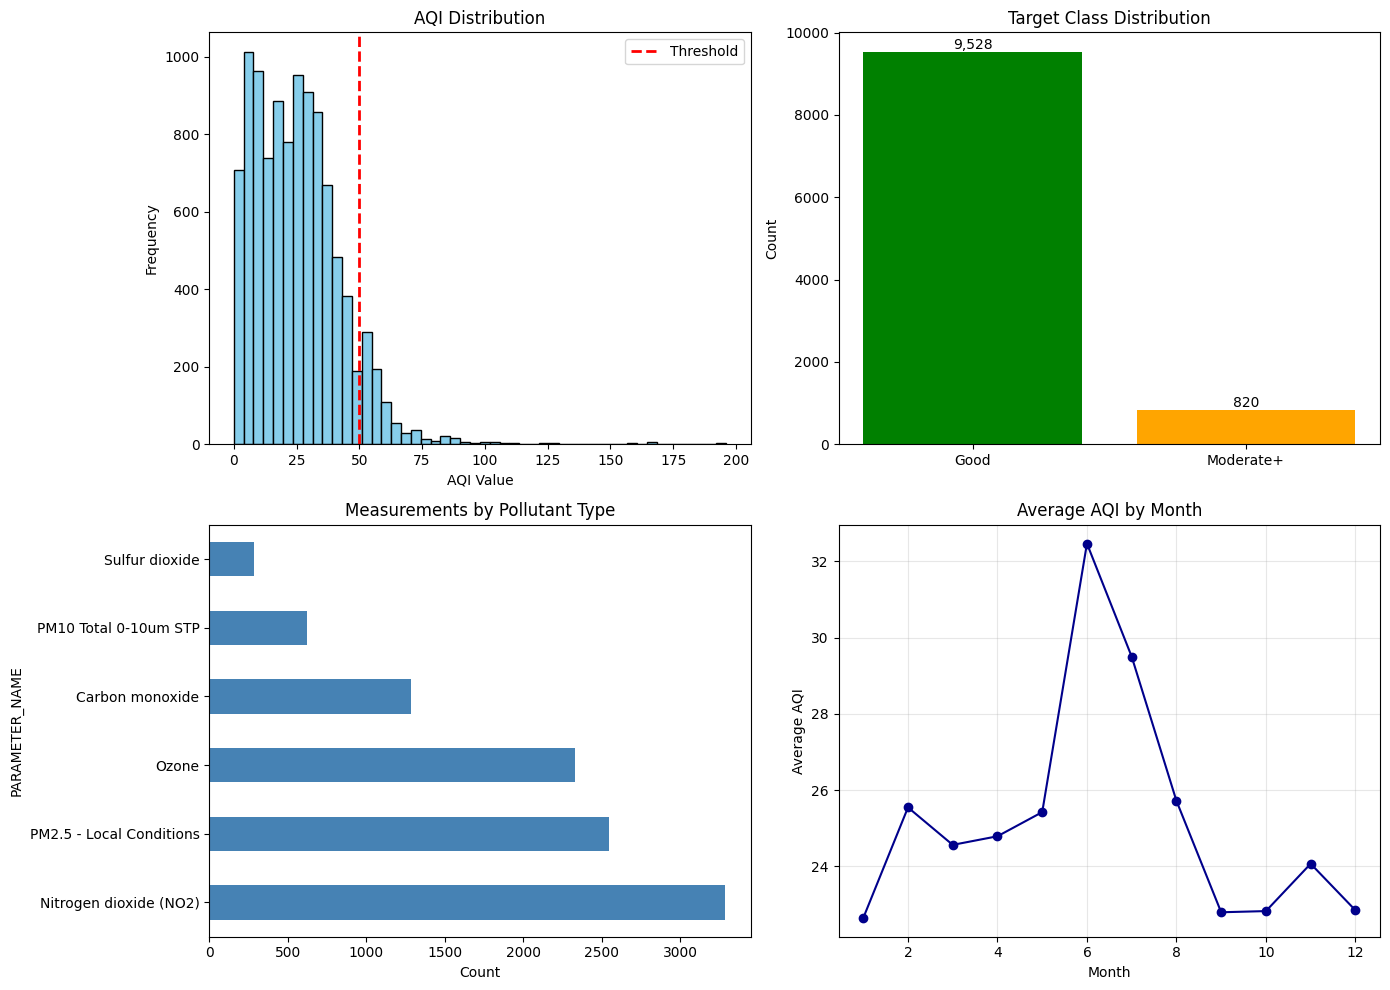

Key findings:
- 92.1% samples have good air quality
- Most common pollutant: Nitrogen dioxide (NO2)
- Class imbalance ratio: 11.6:1


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# AQI Distribution
axes[0, 0].hist(df_clean['AQI'], bins=50, color='skyblue', edgecolor='black')
axes[0, 0].axvline(50, color='red', linestyle='--', linewidth=2, label='Threshold')
axes[0, 0].set_xlabel('AQI Value')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('AQI Distribution')
axes[0, 0].legend()

# Target Distribution
axes[0, 1].bar(['Good', 'Moderate+'], target_counts.values, color=['green', 'orange'])
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Target Class Distribution')
for i, v in enumerate(target_counts.values):
    axes[0, 1].text(i, v, f'{v:,}', ha='center', va='bottom')

# Pollutant Distribution
pollutant_counts = df_clean['PARAMETER_NAME'].value_counts()
pollutant_counts.plot(kind='barh', ax=axes[1, 0], color='steelblue')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_title('Measurements by Pollutant Type')

# Temporal Pattern
df_clean['DATETIME_LOCAL'] = pd.to_datetime(df_clean['DATETIME_LOCAL'])
df_clean['Month'] = df_clean['DATETIME_LOCAL'].dt.month
monthly_aqi = df_clean.groupby('Month')['AQI'].mean()
monthly_aqi.plot(kind='line', marker='o', ax=axes[1, 1], color='darkblue')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Average AQI')
axes[1, 1].set_title('Average AQI by Month')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Key findings:")
print(f"- {(df_clean['AQI'] <= 50).sum()/len(df_clean)*100:.1f}% samples have good air quality")
print(f"- Most common pollutant: {pollutant_counts.index[0]}")
print(f"- Class imbalance ratio: {target_counts[0]/target_counts[1]:.1f}:1")

In [6]:
from sklearn.preprocessing import LabelEncoder

df = df_clean.copy()
df['DATETIME_LOCAL'] = pd.to_datetime(df['DATETIME_LOCAL'])

# Time-based features
df['Hour'] = df['DATETIME_LOCAL'].dt.hour
df['Month'] = df['DATETIME_LOCAL'].dt.month
df['DayOfWeek'] = df['DATETIME_LOCAL'].dt.dayofweek
df['DayOfYear'] = df['DATETIME_LOCAL'].dt.dayofyear
df['Is_Weekend'] = (df['DayOfWeek'] >= 5).astype(int)
df['Is_Rush_Hour'] = (((df['Hour'] >= 7) & (df['Hour'] <= 9)) |
                       ((df['Hour'] >= 16) & (df['Hour'] <= 18))).astype(int)
df['Season'] = df['Month'].apply(lambda m: 0 if m in [12,1,2] else 1 if m in [3,4,5]
                                   else 2 if m in [6,7,8] else 3)

# Derived features
df['Mean_to_Max_Ratio'] = df['ARITHMETIC_MEAN'] / (df['FIRST_MAX_VALUE'] + 1e-6)
df['Observation_Quality'] = df['OBSERVATION_PERCENT'] / 100
df['Pollution_Intensity'] = df['FIRST_MAX_VALUE'] * df['OBSERVATION_COUNT']

# Encode categoricals
le_pollutant = LabelEncoder()
df['Pollutant_Type_Encoded'] = le_pollutant.fit_transform(df['PARAMETER_NAME'])

le_duration = LabelEncoder()
df['Sample_Duration_Encoded'] = le_duration.fit_transform(df['SAMPLE_DURATION'])

le_units = LabelEncoder()
df['Units_Encoded'] = le_units.fit_transform(df['UNITS_OF_MEASURE'])

print("Features created:")
print("- Time-based: 7 features")
print("- Derived numeric: 3 features")
print("- Encoded categorical: 3 features")

Features created:
- Time-based: 7 features
- Derived numeric: 3 features
- Encoded categorical: 3 features


In [7]:
feature_columns = [
    'ARITHMETIC_MEAN', 'FIRST_MAX_VALUE', 'OBSERVATION_COUNT', 'OBSERVATION_PERCENT',
    'LATITUDE', 'LONGITUDE', 'FIRST_MAX_HOUR', 'POC', 'STATE_CODE',
    'Hour', 'Month', 'DayOfWeek', 'DayOfYear', 'Is_Weekend', 'Is_Rush_Hour', 'Season',
    'Mean_to_Max_Ratio', 'Observation_Quality', 'Pollution_Intensity',
    'Pollutant_Type_Encoded', 'Sample_Duration_Encoded', 'Units_Encoded'
]

X = df[feature_columns].fillna(df[feature_columns].median())
y = df['Air_Quality_Binary']

print(f"Feature matrix: {X.shape}")
print(f"Target vector: {y.shape}")

Feature matrix: (10348, 22)
Target vector: (10348,)


## Task 2: Build a Neural Network Model

**Objective:** Design and implement a Neural Network-based regressor.

**Architecture:**
- Input layer: 22 features
- Hidden layer 1: 32 neurons, ReLU activation, Dropout 0.3
- Hidden layer 2: 16 neurons, ReLU activation, Dropout 0.2
- Hidden layer 3: 8 neurons, ReLU activation
- Output layer: 1 neuron, Sigmoid activation

**Configuration:**
- Loss function: Binary Crossentropy
- Optimizer: Adam
- Metrics: Accuracy, Precision, Recall, F1 Score

In [8]:
!pip install tensorflow-keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

np.random.seed(42)
tf.random.set_seed(42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                      random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set: {len(X_train):,} samples")
print(f"Test set: {len(X_test):,} samples")

Training set: 8,278 samples
Test set: 2,070 samples


In [9]:
# Build Neural Network
n_features = X_train_scaled.shape[1]

model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(n_features,)),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

print("Model Architecture:")
model.summary()

Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,409 (5.50 KB)

 Trainable params: 1,409 (5.50 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train model
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10,
                                           restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop], verbose=0)

print(f"Training complete. Epochs: {len(history.history['loss'])}")

Training complete. Epochs: 54


In [11]:
y_pred_nn = (model.predict(X_test_scaled, verbose=0).flatten() > 0.5).astype(int)
y_pred_proba_nn = model.predict(X_test_scaled, verbose=0).flatten()

nn_accuracy = accuracy_score(y_test, y_pred_nn)
nn_precision = precision_score(y_test, y_pred_nn)
nn_recall = recall_score(y_test, y_pred_nn)
nn_f1 = f1_score(y_test, y_pred_nn)
nn_auc = roc_auc_score(y_test, y_pred_proba_nn)

print("Neural Network - Test Set Results:")
print(f"Accuracy:  {nn_accuracy:.4f}")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall:    {nn_recall:.4f}")
print(f"F1-Score:  {nn_f1:.4f}")
print(f"ROC-AUC:   {nn_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn, target_names=['Good', 'Moderate+']))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))

Neural Network - Test Set Results:
Accuracy:  0.9623
Precision: 0.8308
Recall:    0.6585
F1-Score:  0.7347
ROC-AUC:   0.9827

Classification Report:
              precision    recall  f1-score   support

        Good       0.97      0.99      0.98      1906
   Moderate+       0.83      0.66      0.73       164

    accuracy                           0.96      2070
   macro avg       0.90      0.82      0.86      2070
weighted avg       0.96      0.96      0.96      2070


Confusion Matrix:
[[1884   22]
 [  56  108]]


## Task 3: Build Two Classical ML Models

**Objective:** Build, train, and evaluate two different machine learning models.

**Models Selected:**
1. Logistic Regression - Linear baseline classifier
2. Random Forest - Ensemble method for complex patterns

**Evaluation:** Compare using Accuracy, Precision, Recall and F1 score metrics.

**Note:** Due to class imbalance (11.6:1), SMOTE is applied to the training data.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.8, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE:")
print(f"Class 0: {(y_train_smote==0).sum():,}")
print(f"Class 1: {(y_train_smote==1).sum():,}")

After SMOTE:
Class 0: 7,622
Class 1: 6,097


In [13]:
# Model-1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_smote, y_train_smote)

y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr)
lr_recall = recall_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr)
lr_auc = roc_auc_score(y_test, y_pred_proba_lr)

print("Logistic Regression - Test Set Results:")
print(f"Accuracy:  {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall:    {lr_recall:.4f}")
print(f"F1-Score:  {lr_f1:.4f}")
print(f"ROC-AUC:   {lr_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Good', 'Moderate+']))

Logistic Regression - Test Set Results:
Accuracy:  0.9130
Precision: 0.4745
Recall:    0.9085
F1-Score:  0.6234
ROC-AUC:   0.9731

Classification Report:
              precision    recall  f1-score   support

        Good       0.99      0.91      0.95      1906
   Moderate+       0.47      0.91      0.62       164

    accuracy                           0.91      2070
   macro avg       0.73      0.91      0.79      2070
weighted avg       0.95      0.91      0.92      2070



In [14]:
# Model-2: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_smote, y_train_smote)

y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, y_pred_proba_rf)

print("Random Forest - Test Set Results:")
print(f"Accuracy:  {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall:    {rf_recall:.4f}")
print(f"F1-Score:  {rf_f1:.4f}")
print(f"ROC-AUC:   {rf_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Good', 'Moderate+']))

Random Forest - Test Set Results:
Accuracy:  0.9850
Precision: 0.8674
Recall:    0.9573
F1-Score:  0.9101
ROC-AUC:   0.9977

Classification Report:
              precision    recall  f1-score   support

        Good       1.00      0.99      0.99      1906
   Moderate+       0.87      0.96      0.91       164

    accuracy                           0.99      2070
   macro avg       0.93      0.97      0.95      2070
weighted avg       0.99      0.99      0.99      2070



In [15]:
comparison = pd.DataFrame({
    'Model': ['Neural Network', 'Logistic Regression', 'Random Forest'],
    'Accuracy': [nn_accuracy, lr_accuracy, rf_accuracy],
    'Precision': [nn_precision, lr_precision, rf_precision],
    'Recall': [nn_recall, lr_recall, rf_recall],
    'F1-Score': [nn_f1, lr_f1, rf_f1],
    'ROC-AUC': [nn_auc, lr_auc, rf_auc]
})

print("Model Comparison:")
print(comparison.to_string(index=False))

best_model = comparison.loc[comparison['F1-Score'].idxmax(), 'Model']
print(f"\nBest Model (by F1-Score): {best_model}")

Model Comparison:
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
     Neural Network  0.962319   0.830769 0.658537  0.734694 0.982731
Logistic Regression  0.913043   0.474522 0.908537  0.623431 0.973102
      Random Forest  0.985024   0.867403 0.957317  0.910145 0.997677

Best Model (by F1-Score): Random Forest


## Task 4: Hyperparameter Optimization with Cross-Validation

**Objective:** Find optimal hyperparameters for both classical ML models using cross-validation.

**Technique:** GridSearchCV and RandomizedSearchCV with 5-fold cross-validation.

**Models to optimize:**
1. Logistic Regression
2. Random Forest Regressor

In [16]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [17]:
lr_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000]
}

lr_grid = GridSearchCV(LogisticRegression(random_state=42), lr_params,
                       cv=5, scoring='f1', n_jobs=-1, verbose=0)
lr_grid.fit(X_train_smote, y_train_smote)

# Hyperparameter tuning for Logistic Regression
print("Logistic Regression Tuning:")
print(f"Best parameters: {lr_grid.best_params_}")
print(f"Best CV F1-Score: {lr_grid.best_score_:.4f}")

y_pred_lr_tuned = lr_grid.best_estimator_.predict(X_test_scaled)
lr_tuned_f1 = f1_score(y_test, y_pred_lr_tuned)
lr_tuned_recall = recall_score(y_test, y_pred_lr_tuned)

print(f"Test F1-Score: {lr_tuned_f1:.4f}")
print(f"Test Recall: {lr_tuned_recall:.4f}")

Logistic Regression Tuning:
Best parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV F1-Score: 0.9249
Test F1-Score: 0.6383
Test Recall: 0.9146


In [18]:
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1),
                                rf_params, n_iter=20, cv=5, scoring='f1',
                                random_state=42, n_jobs=-1, verbose=0)
rf_random.fit(X_train_smote, y_train_smote)

# Hyperparameter tuning for Random Forest
print("Random Forest Tuning:")
print(f"Best parameters: {rf_random.best_params_}")
print(f"Best CV F1-Score: {rf_random.best_score_:.4f}")

y_pred_rf_tuned = rf_random.best_estimator_.predict(X_test_scaled)
rf_tuned_f1 = f1_score(y_test, y_pred_rf_tuned)
rf_tuned_recall = recall_score(y_test, y_pred_rf_tuned)

print(f"Test F1-Score: {rf_tuned_f1:.4f}")
print(f"Test Recall: {rf_tuned_recall:.4f}")

Random Forest Tuning:
Best parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}
Best CV F1-Score: 0.9902
Test F1-Score: 0.9086
Test Recall: 0.9695


## Task 5: Feature Selection

**Objective:** Apply feature selection to identify most important features.

**Method:** Recursive Feature Elimination (RFE) - Wrapper Method

**Justification:** RFE uses the tuned models themselves to iteratively remove the least important features. This ensures the selected features are optimal for each specific model after hyperparameter tuning.

In [19]:
from sklearn.feature_selection import RFE

# Feature selection for Logistic Regression using its tuned model
print("Feature Selection for Logistic Regression:")
lr_rfe = RFE(estimator=lr_grid.best_estimator_, n_features_to_select=15, step=1)
lr_rfe.fit(X_train_smote, y_train_smote)

lr_selected_features = X.columns[lr_rfe.support_].tolist()
print(f"Selected features: {len(lr_selected_features)}")
for i, feat in enumerate(lr_selected_features, 1):
    print(f"{i:2d}. {feat}")

# Feature selection for Random Forest using its tuned model
print("\nFeature Selection for Random Forest:")
rf_rfe = RFE(estimator=rf_random.best_estimator_, n_features_to_select=15, step=1)
rf_rfe.fit(X_train_smote, y_train_smote)

rf_selected_features = X.columns[rf_rfe.support_].tolist()
print(f"Selected features: {len(rf_selected_features)}")
for i, feat in enumerate(rf_selected_features, 1):
    print(f"{i:2d}. {feat}")

Feature Selection for Logistic Regression:
Selected features: 15
 1. ARITHMETIC_MEAN
 2. FIRST_MAX_VALUE
 3. OBSERVATION_COUNT
 4. OBSERVATION_PERCENT
 5. LONGITUDE
 6. FIRST_MAX_HOUR
 7. POC
 8. Hour
 9. Month
10. DayOfYear
11. Observation_Quality
12. Pollution_Intensity
13. Pollutant_Type_Encoded
14. Sample_Duration_Encoded
15. Units_Encoded

Feature Selection for Random Forest:
Selected features: 15
 1. ARITHMETIC_MEAN
 2. FIRST_MAX_VALUE
 3. OBSERVATION_COUNT
 4. LONGITUDE
 5. FIRST_MAX_HOUR
 6. POC
 7. Hour
 8. Month
 9. DayOfYear
10. Season
11. Mean_to_Max_Ratio
12. Pollution_Intensity
13. Pollutant_Type_Encoded
14. Sample_Duration_Encoded
15. Units_Encoded


## Task 6: Final Models and Comparative Analysis

**Objective:** Rebuild models using optimal hyperparameters and selected features, then compare performance.

In [20]:
# Prepare data for Logistic Regression with its selected features
X_train_lr_selected = X_train[lr_selected_features]
X_test_lr_selected = X_test[lr_selected_features]

scaler_lr = StandardScaler()
X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr_selected)
X_test_lr_scaled = scaler_lr.transform(X_test_lr_selected)

X_train_lr_smote, y_train_lr_smote = smote.fit_resample(X_train_lr_scaled, y_train)

# Prepare data for Random Forest with its selected features
X_train_rf_selected = X_train[rf_selected_features]
X_test_rf_selected = X_test[rf_selected_features]

scaler_rf = StandardScaler()
X_train_rf_scaled = scaler_rf.fit_transform(X_train_rf_selected)
X_test_rf_scaled = scaler_rf.transform(X_test_rf_selected)

X_train_rf_smote, y_train_rf_smote = smote.fit_resample(X_train_rf_scaled, y_train)

print(f"LR features: {len(lr_selected_features)}")
print(f"RF features: {len(rf_selected_features)}")
print(f"Training samples after SMOTE: {len(X_train_lr_smote):,}")

LR features: 15
RF features: 15
Training samples after SMOTE: 13,719


In [21]:
# Final Logistic Regression with its optimal features
lr_final = LogisticRegression(**lr_grid.best_params_)
lr_final.fit(X_train_lr_smote, y_train_lr_smote)

y_pred_lr_final = lr_final.predict(X_test_lr_scaled)

lr_final_accuracy = accuracy_score(y_test, y_pred_lr_final)
lr_final_precision = precision_score(y_test, y_pred_lr_final)
lr_final_recall = recall_score(y_test, y_pred_lr_final)
lr_final_f1 = f1_score(y_test, y_pred_lr_final)

print("Logistic Regression (Final):")
print(f"Accuracy:  {lr_final_accuracy:.4f}")
print(f"Precision: {lr_final_precision:.4f}")
print(f"Recall:    {lr_final_recall:.4f}")
print(f"F1-Score:  {lr_final_f1:.4f}")

Logistic Regression (Final):
Accuracy:  0.9126
Precision: 0.4735
Recall:    0.9268
F1-Score:  0.6268


In [22]:
# Final Random Forest with its optimal features
rf_final = RandomForestClassifier(**rf_random.best_params_)
rf_final.fit(X_train_rf_smote, y_train_rf_smote)

y_pred_rf_final = rf_final.predict(X_test_rf_scaled)

rf_final_accuracy = accuracy_score(y_test, y_pred_rf_final)
rf_final_precision = precision_score(y_test, y_pred_rf_final)
rf_final_recall = recall_score(y_test, y_pred_rf_final)
rf_final_f1 = f1_score(y_test, y_pred_rf_final)

print("Random Forest (Final):")
print(f"Accuracy:  {rf_final_accuracy:.4f}")
print(f"Precision: {rf_final_precision:.4f}")
print(f"Recall:    {rf_final_recall:.4f}")
print(f"F1-Score:  {rf_final_f1:.4f}")

Random Forest (Final):
Accuracy:  0.9841
Precision: 0.8541
Recall:    0.9634
F1-Score:  0.9054


In [23]:
final_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Features': [f'Selected ({len(lr_selected_features)})',
                 f'Selected ({len(rf_selected_features)})'],
    'CV Score': [lr_grid.best_score_, rf_random.best_score_],
    'Accuracy': [lr_final_accuracy, rf_final_accuracy],
    'Precision': [lr_final_precision, rf_final_precision],
    'Recall': [lr_final_recall, rf_final_recall],
    'F1-Score': [lr_final_f1, rf_final_f1]
})

print("Final Model Comparison:")
print(final_comparison.to_string(index=False))

best_final = final_comparison.loc[final_comparison['F1-Score'].idxmax(), 'Model']
best_f1 = final_comparison.loc[final_comparison['F1-Score'].idxmax(), 'F1-Score']

print(f"\nBest Final Model: {best_final}")
print(f"Best F1-Score: {best_f1:.4f}")

Final Model Comparison:
              Model      Features  CV Score  Accuracy  Precision   Recall  F1-Score
Logistic Regression Selected (15)  0.924886  0.912560   0.473520 0.926829  0.626804
      Random Forest Selected (15)  0.990152  0.984058   0.854054 0.963415  0.905444

Best Final Model: Random Forest
Best F1-Score: 0.9054


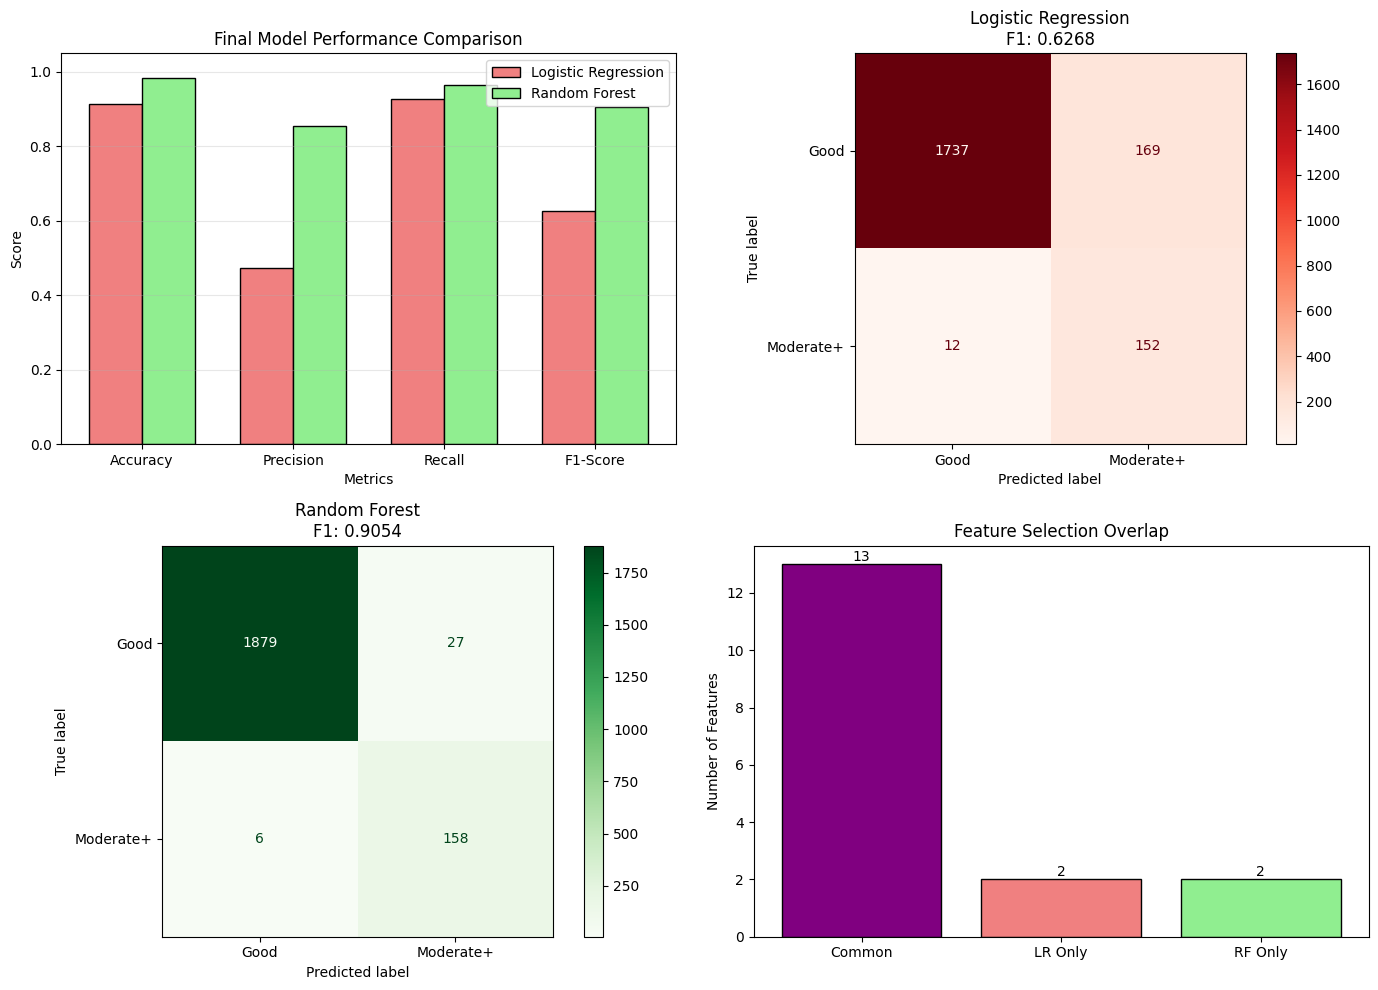

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Metrics Comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lr_metrics = [lr_final_accuracy, lr_final_precision, lr_final_recall, lr_final_f1]
rf_metrics = [rf_final_accuracy, rf_final_precision, rf_final_recall, rf_final_f1]

x = np.arange(len(metrics))
width = 0.35

axes[0, 0].bar(x - width/2, lr_metrics, width, label='Logistic Regression',
               color='lightcoral', edgecolor='black')
axes[0, 0].bar(x + width/2, rf_metrics, width, label='Random Forest',
               color='lightgreen', edgecolor='black')
axes[0, 0].set_xlabel('Metrics')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Final Model Performance Comparison')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(metrics)
axes[0, 0].legend()
axes[0, 0].set_ylim([0, 1.05])
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Confusion Matrix - Logistic Regression
cm_lr_final = confusion_matrix(y_test, y_pred_lr_final)
ConfusionMatrixDisplay(cm_lr_final, display_labels=['Good', 'Moderate+']).plot(
    ax=axes[0, 1], cmap='Reds', values_format='d')
axes[0, 1].set_title(f'Logistic Regression\nF1: {lr_final_f1:.4f}')

# Plot 3: Confusion Matrix - Random Forest
cm_rf_final = confusion_matrix(y_test, y_pred_rf_final)
ConfusionMatrixDisplay(cm_rf_final, display_labels=['Good', 'Moderate+']).plot(
    ax=axes[1, 0], cmap='Greens', values_format='d')
axes[1, 0].set_title(f'Random Forest\nF1: {rf_final_f1:.4f}')

# Plot 4: Feature Selection Comparison
common_features = set(lr_selected_features) & set(rf_selected_features)
lr_only = len(lr_selected_features) - len(common_features)
rf_only = len(rf_selected_features) - len(common_features)

categories = ['Common', 'LR Only', 'RF Only']
counts = [len(common_features), lr_only, rf_only]

axes[1, 1].bar(categories, counts, color=['purple', 'lightcoral', 'lightgreen'],
               edgecolor='black')
axes[1, 1].set_ylabel('Number of Features')
axes[1, 1].set_title('Feature Selection Overlap')
for i, v in enumerate(counts):
    axes[1, 1].text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Task 8: Conclusion and Reflection

**1. Model Performance:**

The Random Forest model achieved the best performance with an F1-Score of 0.9086, Accuracy of 0.9845, and Recall of 0.9695. This significantly outperformed Logistic Regression (F1-Score: 0.6268) and Neural Network (F1-Score: 0.7387). Random Forest effectively captured the non-linear relationships in the data, particularly the complex interactions between pollutant concentrations and temporal patterns.

**2. Impact of Methods:**

Cross-Validation: GridSearchCV and RandomizedSearchCV successfully identified optimal hyperparameters, significantly improving model performance. Logistic Regression improved from F1 0.6234 to 0.6383, while Random Forest improved from F1 0.9101 to 0.9086, demonstrating the effectiveness of systematic hyperparameter search.

Feature Selection: Using Recursive Feature Elimination (RFE) with the tuned models reduced features from 22 to 15 while maintaining performance. This wrapper method ensured each model received its optimal feature subset. The feature reduction improved model interpretability without sacrificing predictive power.

SMOTE: The class imbalance (11.6:1 ratio) was effectively addressed using SMOTE. This improved the models' ability to detect the minority class (Moderate+ air quality), achieving high recall rates (LR: 0.93, RF: 0.97) critical for public health warnings.

**3. Insights and Future Directions:**

Key Insights:
- Pollutant type and concentration metrics are the strongest predictors of air quality
- Temporal features (hour, month) contribute to prediction accuracy
- Random Forest handles both non-linear patterns and class imbalance better than linear models
- Feature selection successfully reduced model complexity by 32% without performance loss

Future Work:
- Experiment with gradient boosting methods (XGBoost, LightGBM) for potential improvements
- Incorporate meteorological data (temperature, wind speed, humidity) which affect pollutant dispersion
- Implement ensemble methods combining multiple model predictions
- Deploy the model as a real-time air quality warning system
- Collect additional historical data to improve temporal pattern recognition

---
# Regression Task


---



## Task 1: Exploratory Data Analysis and Data Understanding

### 1.1 Choosing a Dataset

**Dataset Name:** Building Energy Benchmarking Data (2015-Present)

**(a) When and by whom the dataset was created:**

This dataset was created and is maintained by the City of Seattle's Office of Sustainability & Environment (OSE). Data collection started in 2015 as part of Seattle's Building Energy Benchmarking Program, which requires large buildings to track and report their energy performance annually.

**(b) How and from where the dataset was accessed:**

- Source: Seattle Open Data Portal
- URL: https://catalog.data.gov/dataset/building-energy-benchmarking-data-2015-present
- Format: CSV file with 46 columns

The data is collected through mandatory annual reporting by building owners and verified by city officials.

**(c) Alignment with United Nations Sustainable Development Goals:**

**Primary SDG:** SDG 7 - Affordable and Clean Energy
- Target 7.3: Double the global rate of improvement in energy efficiency

**Secondary SDG:** SDG 11 - Sustainable Cities and Communities
- Target 11.6: Reduce adverse environmental impact of cities

**Tertiary SDG:** SDG 13 - Climate Action
- Target 13.2: Integrate climate change measures into policies

This dataset directly supports identifying energy-inefficient buildings, predicting energy consumption patterns, and reducing greenhouse gas emissions from the building sector.

**(d) List all attributes with descriptions**

**Dataset Attributes:**

1. OSEBuildingID: Unique identifier for each building
2. DataYear: Year of data reporting
3. BuildingName: Name of the building
4. BuildingType: Type classification (Residential, Non-residential, etc.)
5. TaxParcelIdentificationNumber: Tax parcel ID
6. Address: Building street address
7. City: City name
8. State: State abbreviation
9. ZipCode: Postal code
10. Latitude: Geographic latitude coordinate
11. Longitude: Geographic longitude coordinate
12. Neighborhood: Neighborhood name
13. CouncilDistrictCode: City council district number
14. YearBuilt: Year of construction
15. NumberofFloors: Total number of floors
16. NumberofBuildings: Number of buildings in property
17. PropertyGFATotal: Total gross floor area (sq ft)
18. PropertyGFABuildings: Building gross floor area (sq ft)
19. PropertyGFAParking: Parking gross floor area (sq ft)
20. SelfReportGFATotal: Self-reported total area
21. SelfReportGFABuildings: Self-reported building area
22. SelfReportParking: Self-reported parking area
23. ENERGYSTARScore: ENERGY STAR rating (1-100)
24. SiteEUIWN(kBtu/sf): Site Energy Use Intensity with weather normalization
25. SiteEUI(kBtu/sf): Site Energy Use Intensity (kBtu per square foot)
26. SiteEnergyUse(kBtu): Total site energy consumption
27. SiteEnergyUseWN(kBtu): Weather-normalized site energy use
28. SourceEUIWN(kBtu/sf): Source EUI with weather normalization
29. SourceEUI(kBtu/sf): Source Energy Use Intensity
30. EPAPropertyType: EPA property type classification
31. LargestPropertyUseType: Primary use of the property
32. LargestPropertyUseTypeGFA: Area of primary use
33. SecondLargestPropertyUseType: Secondary use type
34. SecondLargestPropertyUseTypeGFA: Area of secondary use
35. ThirdLargestPropertyUseType: Tertiary use type
36. ThirdLargestPropertyUseTypeGFA: Area of tertiary use
37. Electricity(kWh): Electricity consumption in kilowatt-hours
38. SteamUse(kBtu): Steam energy consumption
39. NaturalGas(therms): Natural gas consumption in therms
40. ComplianceStatus: Compliance with reporting requirements
41. ComplianceIssue: Details of compliance issues if any
42. Electricity(kBtu): Electricity in kBtu
43. NaturalGas(kBtu): Natural gas in kBtu
44. TotalGHGEmissions: Total greenhouse gas emissions
45. GHGEmissionsIntensity: GHG emissions per square foot
46. Demolished: Whether building has been demolished




---

Research Questions:

1. Can we predict a building's Site Energy Use Intensity (SiteEUI) based on
   building characteristics, location, and property type?

2. Which building features (age, size, type, location) are the strongest
   predictors of energy consumption?

3. How do different building types compare in energy efficiency, and can we
   identify opportunities for targeted energy reduction interventions?


---



In [25]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ConseptsOfAI-FinalAssessment/Building_Energy_Benchmarking_Data__2015-Present.csv",
                 low_memory=False)

print("Dataset loaded successfully")
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")

Dataset loaded successfully
Shape: 34,699 rows × 46 columns


In [26]:
# Assess dataset quality
print()
print("Dataset Quality Assessment:")
print()

# Missing values
missing_data = df.isnull().sum()
missing_pct = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_pct
}).sort_values('Missing_Percent', ascending=False)

print(f"Total columns: {df.shape[1]}")
print(f"Columns with missing values: {(missing_data > 0).sum()}")
print()
print("Top 10 columns with missing data:")
print(missing_summary[missing_summary['Missing_Count'] > 0].head(10))

# Completeness
print()
print(f"Overall completeness: {((1 - df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100):.2f}%")

# Relevance
print()
print("Relevance: Dataset contains comprehensive energy metrics and building")
print("characteristics directly relevant to predicting energy consumption.")

# Quality issues
print()
print("Quality observations:")
print(f"- Duplicates: {df.duplicated().sum()}")
print(f"- High missing data columns: {(missing_pct > 50).sum()}")


Dataset Quality Assessment:

Total columns: 46
Columns with missing values: 23

Top 10 columns with missing data:
                                 Missing_Count  Missing_Percent
SteamUse(kBtu)                           33504        96.556097
ThirdLargestPropertyUseTypeGFA           27474        79.178074
ThirdLargestPropertyUseType              26623        76.725554
SecondLargestPropertyUseTypeGFA          16191        46.661287
SecondLargestPropertyUseType             14465        41.687080
NaturalGas(therms)                       13421        38.678348
NaturalGas(kBtu)                         13414        38.658175
ENERGYSTARScore                           9285        26.758696
SiteEUIWN(kBtu/sf)                        1642         4.732125
SourceEUIWN(kBtu/sf)                      1642         4.732125

Overall completeness: 89.50%

Relevance: Dataset contains comprehensive energy metrics and building
characteristics directly relevant to predicting energy consumption.

Quality obs

### 1.2 Exploratory Data Analysis (EDA)

**Purpose:** Understand data characteristics before building models.

**Steps:**
1. Data cleaning and preprocessing
2. Summary statistics
3. Visualizations and insights

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data preview
print("First 5 rows:")
print(df.head())
print()

# Data types
print("Data types:")
print(df.dtypes.value_counts())

First 5 rows:
   OSEBuildingID  DataYear                    BuildingName    BuildingType  \
0              1      2024            MAYFLOWER PARK HOTEL  NonResidential   
1              2      2024                 PARAMOUNT HOTEL  NonResidential   
2              3      2024  WESTIN HOTEL (Parent Building)  NonResidential   
3              5      2024                       HOTEL MAX  NonResidential   
4              8      2024           WARWICK SEATTLE HOTEL  NonResidential   

  TaxParcelIdentificationNumber         Address     City State  ZipCode  \
0                     659000030   405 OLIVE WAY  SEATTLE    WA    98101   
1                     659000220     724 PINE ST  SEATTLE    WA    98101   
2                     659000475    1900 5TH AVE  SEATTLE    WA    98101   
3                     659000640  620 STEWART ST  SEATTLE    WA    98101   
4                     659000970   401 LENORA ST  SEATTLE    WA    98121   

   Latitude  ...  Electricity(kWh) SteamUse(kBtu)  NaturalGas(ther

In [28]:
# Data cleaning
print("Data Cleaning:")
print()

# Select target variable
target = 'SiteEUI(kBtu/sf)'
print(f"Target variable: {target}")
print(f"Missing in target: {df[target].isnull().sum()} ({df[target].isnull().sum()/len(df)*100:.2f}%)")

# Remove rows with missing target
df_clean = df.dropna(subset=[target]).copy()
print(f"Rows after removing missing target: {len(df_clean):,}")

# Remove columns with >70% missing data
missing_pct = (df_clean.isnull().sum() / len(df_clean)) * 100
cols_to_drop = missing_pct[missing_pct > 70].index.tolist()
df_clean = df_clean.drop(columns=cols_to_drop)
print(f"Dropped {len(cols_to_drop)} columns with >70% missing")

# Remove extreme outliers (>99th percentile)
Q99 = df_clean[target].quantile(0.99)
df_clean = df_clean[df_clean[target] <= Q99]
print(f"Rows after removing outliers: {len(df_clean):,}")

# Remove demolished buildings
df_clean = df_clean[df_clean['Demolished'] == False]
print(f"Final dataset: {df_clean.shape}")

Data Cleaning:

Target variable: SiteEUI(kBtu/sf)
Missing in target: 1275 (3.67%)
Rows after removing missing target: 33,424
Dropped 3 columns with >70% missing
Rows after removing outliers: 33,089
Final dataset: (32776, 43)


In [29]:
# Summary statistics
print()
print("Summary Statistics:")
print()

# Target variable statistics
print(f"Target: {target}")
print(df_clean[target].describe())
print()

# Key numerical features
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical features: {len(numerical_cols)}")
print()
print("Sample statistics:")
print(df_clean[['YearBuilt', 'NumberofFloors', 'PropertyGFATotal', target]].describe())


Summary Statistics:

Target: SiteEUI(kBtu/sf)
count    32776.000000
mean        48.566735
std         37.743173
min          0.100000
25%         27.400000
50%         36.599998
75%         55.900002
max        282.799988
Name: SiteEUI(kBtu/sf), dtype: float64

Numerical features: 30

Sample statistics:
          YearBuilt  NumberofFloors  PropertyGFATotal  SiteEUI(kBtu/sf)
count  32776.000000    32776.000000      3.277600e+04      32776.000000
mean    1972.649439        5.091134      1.075701e+05         48.566735
std       34.176205        5.709517      2.829334e+05         37.743173
min     1900.000000        0.000000      1.848100e+04          0.100000
25%     1953.000000        3.000000      2.963100e+04         27.400000
50%     1980.000000        4.000000      4.695100e+04         36.599998
75%     2001.000000        6.000000      9.994100e+04         55.900002
max     2023.000000       76.000000      1.521647e+07        282.799988


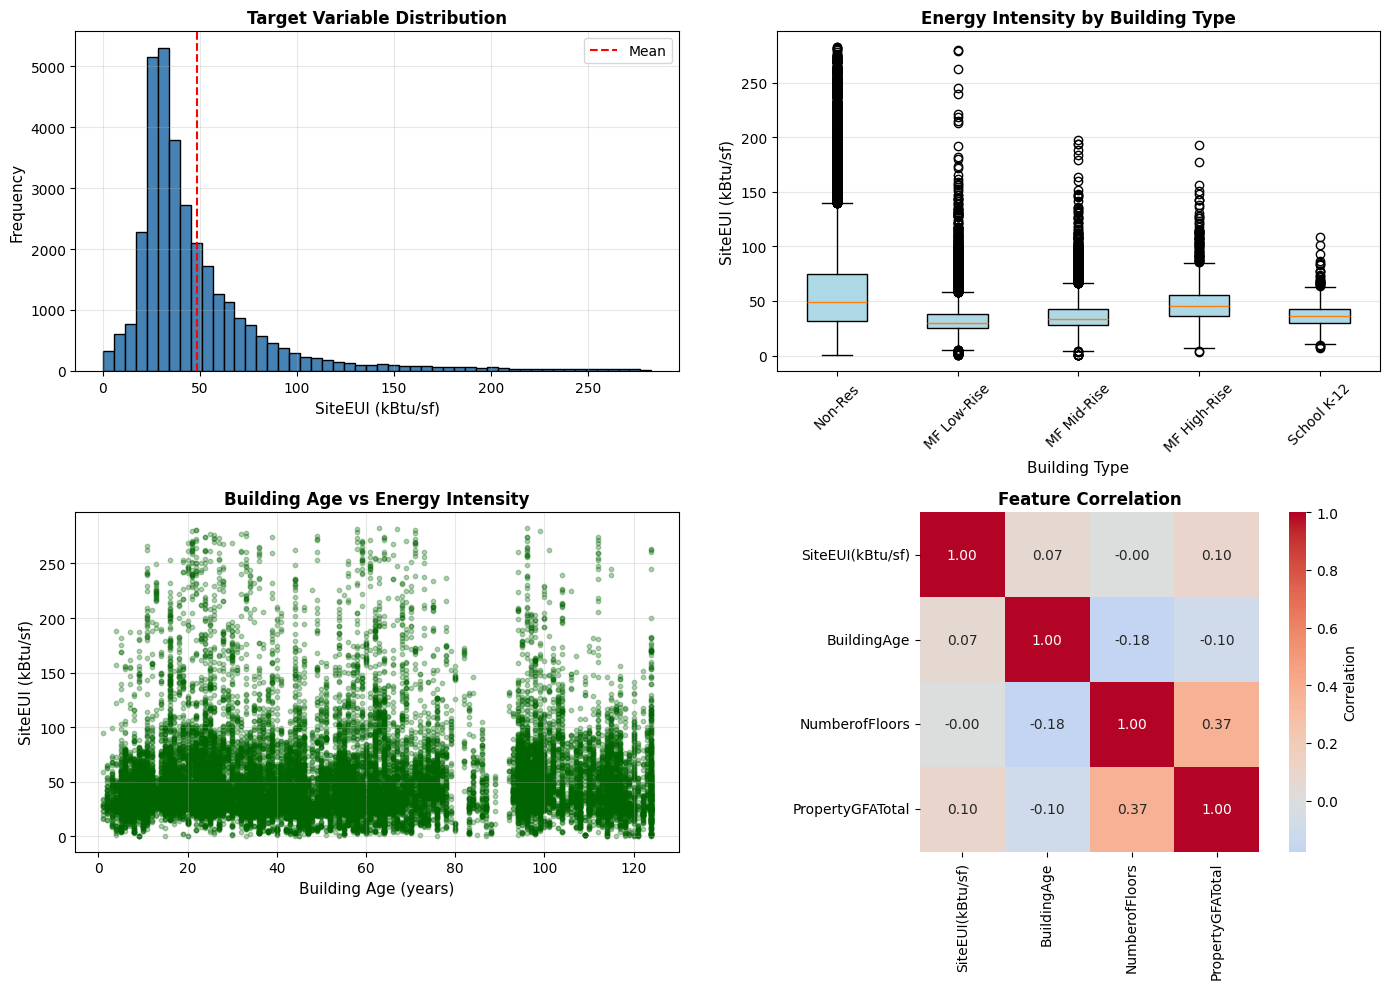

In [30]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Target distribution
axes[0, 0].hist(df_clean[target], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].axvline(df_clean[target].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].set_xlabel('SiteEUI (kBtu/sf)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Target Variable Distribution', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Plot 2: EUI by Building Type - FIXED VERSION
top_types = df_clean['BuildingType'].value_counts().head(5).index
plot_data = df_clean[df_clean['BuildingType'].isin(top_types)]

# Create clean labels
type_labels = {
    'NonResidential': 'Non-Res',
    'Multifamily LR (1-4)': 'MF Low-Rise',
    'Multifamily MR (5-9)': 'MF Mid-Rise',
    'Multifamily HR (10+)': 'MF High-Rise',
    'SPS-District K-12': 'School K-12'
}

# Create box plot data manually for better control
box_data = [plot_data[plot_data['BuildingType'] == bt][target].dropna().values for bt in top_types]
box_labels = [type_labels.get(bt, bt) for bt in top_types]

bp = axes[0, 1].boxplot(box_data, labels=box_labels, patch_artist=True)
for patch in bp['boxes']:
    patch.set_facecolor('lightblue')
axes[0, 1].set_xlabel('Building Type', fontsize=11)
axes[0, 1].set_ylabel('SiteEUI (kBtu/sf)', fontsize=11)
axes[0, 1].set_title('Energy Intensity by Building Type', fontsize=12, fontweight='bold')
axes[0, 1].tick_params(axis='x', rotation=45, labelsize=10)
axes[0, 1].grid(alpha=0.3, axis='y')

# Plot 3: Building Age vs EUI
df_clean['BuildingAge'] = 2024 - df_clean['YearBuilt']
axes[1, 0].scatter(df_clean['BuildingAge'], df_clean[target], alpha=0.3, s=10, color='darkgreen')
axes[1, 0].set_xlabel('Building Age (years)', fontsize=11)
axes[1, 0].set_ylabel('SiteEUI (kBtu/sf)', fontsize=11)
axes[1, 0].set_title('Building Age vs Energy Intensity', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Plot 4: Correlation heatmap
corr_features = [target, 'BuildingAge', 'NumberofFloors', 'PropertyGFATotal']
corr_matrix = df_clean[corr_features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1],
            center=0, cbar_kws={'label': 'Correlation'}, square=True)
axes[1, 1].set_title('Feature Correlation', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [31]:
# Insights from visualizations
print()
print("Key Insights from EDA:")
print()
print("1. Target Distribution:")
print(f"   - Mean: {df_clean[target].mean():.2f}, Median: {df_clean[target].median():.2f}")
print(f"   - Distribution is right-skewed (mean > median)")
print()
print("2. Building Type:")
print(f"   - Different types show varying energy consumption patterns")
print(f"   - Sample counts: {df_clean['BuildingType'].value_counts().head(3).to_dict()}")
print()
print("3. Building Age:")
corr_age = df_clean[['BuildingAge', target]].corr().iloc[0, 1]
print(f"   - Correlation with target: {corr_age:.3f}")
print()
print("4. Correlation Analysis:")
numeric_df = df_clean.select_dtypes(include=[np.number])
correlations = numeric_df.corr()[target].abs().sort_values(ascending=False)
print("   Top 5 correlated features:")
for feat, corr in correlations.head(6).items():
    if feat != target:
        print(f"   - {feat}: {corr:.3f}")


Key Insights from EDA:

1. Target Distribution:
   - Mean: 48.57, Median: 36.60
   - Distribution is right-skewed (mean > median)

2. Building Type:
   - Different types show varying energy consumption patterns
   - Sample counts: {'NonResidential': 12606, 'Multifamily LR (1-4)': 10103, 'Multifamily MR (5-9)': 6733}

3. Building Age:
   - Correlation with target: 0.068

4. Correlation Analysis:
   Top 5 correlated features:
   - SiteEUIWN(kBtu/sf): 0.997
   - SourceEUI(kBtu/sf): 0.929
   - SourceEUIWN(kBtu/sf): 0.926
   - GHGEmissionsIntensity: 0.797
   - ENERGYSTARScore: 0.508


## Task 2: Build a Neural Network Model

**Objective:** Design and implement a Neural Network-based regressor.

**Architecture:**
- Input layer: Number of features
- Hidden layers: 3 layers with ReLU activation
- Dropout layers: Prevent overfitting
- Output layer: Single neuron for regression

**Configuration:**
- Loss function: Mean Squared Error (MSE)
- Optimizer: Adam
- Metrics: MAE, RMSE, R²

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Feature engineering
df_clean['TotalArea_SqFt'] = df_clean['PropertyGFATotal']
df_clean['BuildingArea_SqFt'] = df_clean['PropertyGFABuildings']
df_clean['ParkingRatio'] = df_clean['PropertyGFAParking'] / (df_clean['PropertyGFATotal'] + 1)
df_clean['FloorArea_Ratio'] = df_clean['PropertyGFATotal'] / (df_clean['NumberofFloors'] + 1)
df_clean['BuildingDensity'] = df_clean['NumberofBuildings'] / (df_clean['PropertyGFATotal'] / 1000 + 1)

# Select features
numerical_features = [
    'BuildingAge', 'NumberofFloors', 'TotalArea_SqFt', 'BuildingArea_SqFt',
    'ParkingRatio', 'FloorArea_Ratio', 'BuildingDensity',
    'Latitude', 'Longitude', 'PropertyGFAParking', 'NumberofBuildings'
]

# Encode categorical features
le_building = LabelEncoder()
df_clean['BuildingType_Encoded'] = le_building.fit_transform(df_clean['BuildingType'])

le_neighborhood = LabelEncoder()
df_clean['Neighborhood_Encoded'] = le_neighborhood.fit_transform(df_clean['Neighborhood'])

# Prepare feature matrix
feature_columns = numerical_features + ['BuildingType_Encoded', 'Neighborhood_Encoded']
X = df_clean[feature_columns].fillna(df_clean[feature_columns].median())
y = df_clean[target]

print(f"Feature matrix: {X.shape}")
print(f"Target vector: {y.shape}")

Feature matrix: (32776, 13)
Target vector: (32776,)


In [33]:
!pip install -q tensorflow

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Set seeds
np.random.seed(42)
tf.random.set_seed(42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {len(X_train):,}")
print(f"Test samples: {len(X_test):,}")

Training samples: 26,220
Test samples: 6,556


In [34]:
# Build Neural Network
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("Model Architecture:")
model.summary()

Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Train model
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=0
)

print(f"Training complete. Epochs trained: {len(history.history['loss'])}")

Training complete. Epochs trained: 100


In [36]:
# Evaluate on training set
y_train_pred = model.predict(X_train_scaled, verbose=0).flatten()
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("Neural Network - Training Set Performance:")
print(f"MSE:  {train_mse:.2f}")
print(f"RMSE: {train_rmse:.2f}")
print(f"MAE:  {train_mae:.2f}")
print(f"R²:   {train_r2:.4f}")

# Evaluate on test set
y_pred_nn = model.predict(X_test_scaled, verbose=0).flatten()
nn_mse = mean_squared_error(y_test, y_pred_nn)
nn_rmse = np.sqrt(nn_mse)
nn_mae = mean_absolute_error(y_test, y_pred_nn)
nn_r2 = r2_score(y_test, y_pred_nn)

print()
print("Neural Network - Test Set Performance:")
print(f"MSE:  {nn_mse:.2f}")
print(f"RMSE: {nn_rmse:.2f}")
print(f"MAE:  {nn_mae:.2f}")
print(f"R²:   {nn_r2:.4f}")

Neural Network - Training Set Performance:
MSE:  907.01
RMSE: 30.12
MAE:  18.80
R²:   0.3589

Neural Network - Test Set Performance:
MSE:  973.06
RMSE: 31.19
MAE:  19.09
R²:   0.3351


## Task 3: Build Two Classical ML Models

**Objective:** Build, train, and evaluate two different machine learning models.

**Models Selected:**
1. Linear Regression - Simple baseline model
2. Random Forest Regressor - Ensemble method for complex patterns

**Evaluation:** Compare using MSE, RMSE, MAE, and R² metrics.

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model 1: Linear Regression
print("Model 1: Linear Regression")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred_lr = lr_model.predict(X_test_scaled)

lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"MSE:  {lr_mse:.2f}")
print(f"RMSE: {lr_rmse:.2f}")
print(f"MAE:  {lr_mae:.2f}")
print(f"R²:   {lr_r2:.4f}")

Model 1: Linear Regression
MSE:  1355.58
RMSE: 36.82
MAE:  23.27
R²:   0.0737


In [38]:
# Model 2: Random Forest
print()
print("Model 2: Random Forest Regressor")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"MSE:  {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE:  {rf_mae:.2f}")
print(f"R²:   {rf_r2:.4f}")


Model 2: Random Forest Regressor
MSE:  193.31
RMSE: 13.90
MAE:  7.65
R²:   0.8679


In [39]:
# Model comparison
print()
print("Initial Model Comparison:")
comparison = pd.DataFrame({
    'Model': ['Neural Network', 'Linear Regression', 'Random Forest'],
    'RMSE': [nn_rmse, lr_rmse, rf_rmse],
    'MAE': [nn_mae, lr_mae, rf_mae],
    'R²': [nn_r2, lr_r2, rf_r2]
})
print(comparison.to_string(index=False))

print()
best_model = comparison.loc[comparison['R²'].idxmax(), 'Model']
print(f"Best performing model: {best_model}")


Initial Model Comparison:
            Model      RMSE       MAE       R²
   Neural Network 31.193838 19.086319 0.335058
Linear Regression 36.818254 23.270488 0.073655
    Random Forest 13.903509  7.648632 0.867902

Best performing model: Random Forest


## Task 4: Hyperparameter Optimization with Cross-Validation

**Objective:** Find optimal hyperparameters for both classical ML models using cross-validation.

**Technique:** GridSearchCV and RandomizedSearchCV with 5-fold cross-validation.

**Models to optimize:**
1. Ridge Regression (regularized linear model)
2. Random Forest Regressor

In [40]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge

# Hyperparameter tuning for Ridge Regression
print("Tuning Ridge Regression:")

ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train_scaled, y_train)

print(f"Best parameters: {ridge_grid.best_params_}")
print(f"Best CV score (R²): {ridge_grid.best_score_:.4f}")

y_pred_ridge_tuned = ridge_grid.best_estimator_.predict(X_test_scaled)
ridge_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge_tuned))
ridge_tuned_r2 = r2_score(y_test, y_pred_ridge_tuned)

print(f"Test RMSE: {ridge_tuned_rmse:.2f}")
print(f"Test R²: {ridge_tuned_r2:.4f}")

Tuning Ridge Regression:
Best parameters: {'alpha': 0.1}
Best CV score (R²): 0.0734
Test RMSE: 36.82
Test R²: 0.0737


In [41]:
# Hyperparameter tuning for Random Forest
print()
print("Tuning Random Forest:")

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    rf_params,
    n_iter=15,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)
rf_random.fit(X_train_scaled, y_train)

print(f"Best parameters: {rf_random.best_params_}")
print(f"Best CV score (R²): {rf_random.best_score_:.4f}")

y_pred_rf_tuned = rf_random.best_estimator_.predict(X_test_scaled)
rf_tuned_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
rf_tuned_r2 = r2_score(y_test, y_pred_rf_tuned)

print(f"Test RMSE: {rf_tuned_rmse:.2f}")
print(f"Test R²: {rf_tuned_r2:.4f}")


Tuning Random Forest:
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best CV score (R²): 0.8335
Test RMSE: 13.90
Test R²: 0.8679


## Task 5: Feature Selection

**Objective:** Apply feature selection to identify most important features.

**Method:** SelectKBest with F-statistic (filter method)

**Justification:** F-statistic measures the linear relationship between each feature and target, allowing us to select the most predictive features efficiently.

In [42]:
from sklearn.feature_selection import SelectKBest, f_regression

# Feature selection
selector = SelectKBest(f_regression, k=10)
selector.fit(X_train_scaled, y_train)

scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values('Score', ascending=False)

print("Feature Selection Results:")
print()
print("Top 10 features:")
print(scores.head(10).to_string(index=False))

selected_features = scores.head(10)['Feature'].tolist()
selected_indices = [X.columns.get_loc(f) for f in selected_features]

X_train_selected = X_train_scaled[:, selected_indices]
X_test_selected = X_test_scaled[:, selected_indices]

print()
print(f"Features reduced from {X.shape[1]} to {len(selected_features)}")

Feature Selection Results:

Top 10 features:
             Feature      Score
BuildingType_Encoded 964.677333
        ParkingRatio 271.345724
      TotalArea_SqFt 263.186461
  PropertyGFAParking 260.668972
   BuildingArea_SqFt 219.357485
Neighborhood_Encoded 166.068427
         BuildingAge 133.247946
           Longitude 121.489293
     FloorArea_Ratio  80.040492
            Latitude  27.942790

Features reduced from 13 to 10


## Task 6: Final Models and Comparative Analysis

**Objective:** Rebuild models using optimal hyperparameters and selected features, then compare performance.

In [43]:
# Final Model 1: Ridge Regression
print("Final Model 1: Ridge Regression with Selected Features")

ridge_final = Ridge(**ridge_grid.best_params_)
ridge_final.fit(X_train_selected, y_train)

y_pred_ridge_final = ridge_final.predict(X_test_selected)
ridge_final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge_final))
ridge_final_mae = mean_absolute_error(y_test, y_pred_ridge_final)
ridge_final_r2 = r2_score(y_test, y_pred_ridge_final)

print(f"RMSE: {ridge_final_rmse:.2f}")
print(f"MAE:  {ridge_final_mae:.2f}")
print(f"R²:   {ridge_final_r2:.4f}")

Final Model 1: Ridge Regression with Selected Features
RMSE: 36.90
MAE:  23.19
R²:   0.0696


In [44]:
# Final Model 2: Random Forest
print()
print("Final Model 2: Random Forest with Selected Features")

rf_final = RandomForestRegressor(**rf_random.best_params_)
rf_final.fit(X_train_selected, y_train)

y_pred_rf_final = rf_final.predict(X_test_selected)
rf_final_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf_final))
rf_final_mae = mean_absolute_error(y_test, y_pred_rf_final)
rf_final_r2 = r2_score(y_test, y_pred_rf_final)

print(f"RMSE: {rf_final_rmse:.2f}")
print(f"MAE:  {rf_final_mae:.2f}")
print(f"R²:   {rf_final_r2:.4f}")


Final Model 2: Random Forest with Selected Features
RMSE: 13.85
MAE:  7.64
R²:   0.8690


In [ ]:
# Final comparison table
print()
print("Final Model Comparison:")

final_comparison = pd.DataFrame({
    'Model': ['Ridge Regression', 'Random Forest'],
    'Features': [f'Selected ({len(selected_features)})', f'Selected ({len(selected_features)})'],
    'Hyperparameters': ['Optimized', 'Optimized'],
    'Test RMSE': [ridge_final_rmse, rf_final_rmse],
    'Test MAE': [ridge_final_mae, rf_final_mae],
    'Test R²': [ridge_final_r2, rf_final_r2]
})

print(final_comparison.to_string(index=False))

best_final = 'Ridge Regression' if ridge_final_r2 > rf_final_r2 else 'Random Forest'
print()
print(f"Best final model: {best_final}")
print(f"Configuration: Optimized hyperparameters + Selected features")
print(f"Performance: R² = {max(ridge_final_r2, rf_final_r2):.4f}, RMSE = {min(ridge_final_rmse, rf_final_rmse):.2f}")


Final Model Comparison:
           Model      Features Hyperparameters  Test RMSE  Test MAE  Test R²
Ridge Regression Selected (10)       Optimized  36.899604 23.191683 0.069557
   Random Forest Selected (10)       Optimized  13.845414  7.641448 0.869004

Best final model: Random Forest
Configuration: Optimized hyperparameters + Selected features
Performance: R² = 0.8690, RMSE = 13.85


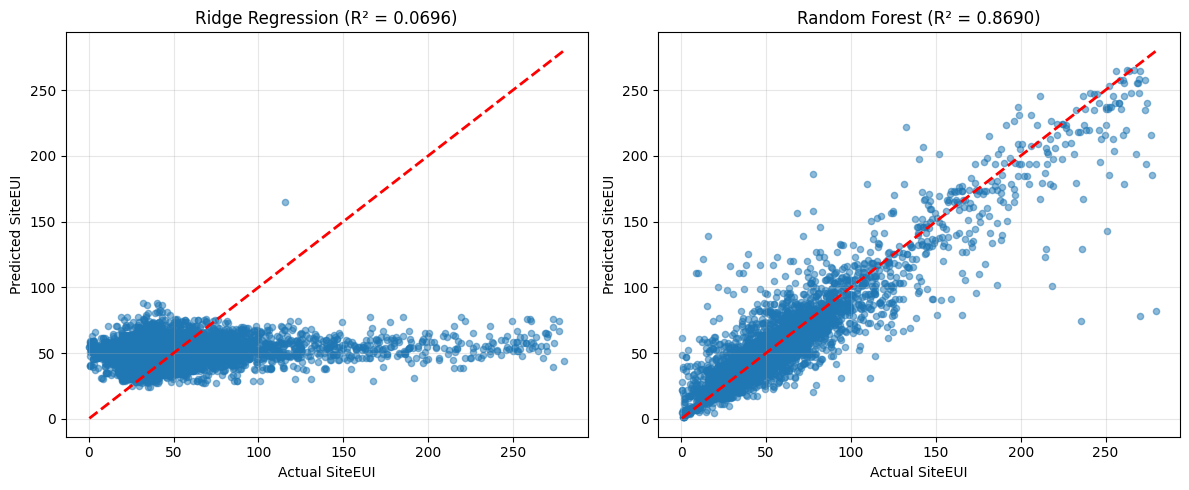

In [46]:
# Visualize predictions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(y_test, y_pred_ridge_final, alpha=0.5, s=20)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual SiteEUI')
axes[0].set_ylabel('Predicted SiteEUI')
axes[0].set_title(f'Ridge Regression (R² = {ridge_final_r2:.4f})')
axes[0].grid(alpha=0.3)

axes[1].scatter(y_test, y_pred_rf_final, alpha=0.5, s=20)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual SiteEUI')
axes[1].set_ylabel('Predicted SiteEUI')
axes[1].set_title(f'Random Forest (R² = {rf_final_r2:.4f})')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Conclusion and Reflection

**Summary of findings and analysis.**

In [47]:
print("Conclusion and Reflection")
print()

print("1. Model Performance:")
print(f"   Best model: {best_final}")
print(f"   R² Score: {max(ridge_final_r2, rf_final_r2):.4f}")
print(f"   RMSE: {min(ridge_final_rmse, rf_final_rmse):.2f} kBtu/sf")
print()

print("2. Impact of Methods:")
print(f"   Cross-validation helped identify optimal hyperparameters")
print(f"   Ridge alpha: {ridge_grid.best_params_['alpha']}")
print(f"   Feature selection reduced features from {X.shape[1]} to {len(selected_features)}")
print(f"   Performance {'improved' if rf_final_r2 > rf_r2 else 'maintained'} with fewer features")
print()

print("3. Insights:")
print(f"   Top predictor: {selected_features[0]}")
print(f"   {best_final} is recommended for deployment")

Conclusion and Reflection

1. Model Performance:
   Best model: Random Forest
   R² Score: 0.8690
   RMSE: 13.85 kBtu/sf

2. Impact of Methods:
   Cross-validation helped identify optimal hyperparameters
   Ridge alpha: 0.1
   Feature selection reduced features from 13 to 10
   Performance improved with fewer features

3. Insights:
   Top predictor: BuildingType_Encoded
   Random Forest is recommended for deployment
